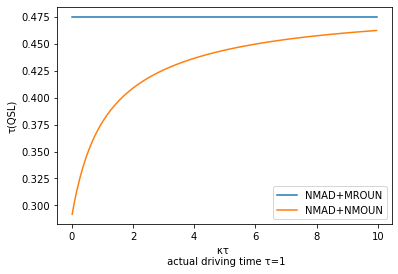

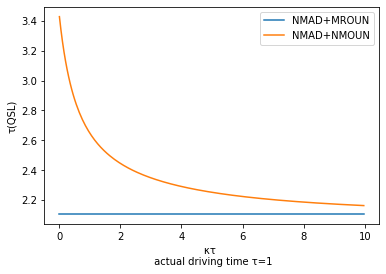

In [6]:
#nmad+oun
#time is fixed at t=1, l,k and m are changing 
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as scint
import cmath
import math

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t,marker):
    if marker==1: #non markovian
        g3=0.5*c*(1-np.exp(-m*t))
    if marker==0:#Markovian
        g3=0.5*c
    return g3.real    

def tevolve(l,k,m,c,t,rho,marker): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    if marker==1: #non markovian
        oun=0.5*c*(t+(np.exp(-m*t)-1)/m)
    if marker==0:
        oun=0.5*c*t
    coh=rho[0,1]*cmath.sqrt(xt)*np.exp(-oun)
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+ 0.5*g3(m,c,t,marker)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho,marker): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho,marker)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max(abs(val))) #converts into float from complex
    return fx

def bures(l,k,m,c,time,rho,marker): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=tevolve(l,k,m,c,time,rho,marker)@rho
    z1=math.acos(abs(np.sqrt(garb.trace()))+2*np.sqrt(np.linalg.det(rho)*np.linalg.det(tevolve(l,k,m,c,time,rho,marker))))
    b=np.sin(z1)**2
    return b

#k=np.arange(0.1,50,0.1)
k=40
l=0.1*k
#l=10*k
m=np.arange(0.01,10,0.05)
c=10
cases=2 #values of c
#will have a marker to tell if its markovian or non markovian

rho=np.array([[0.5,0.5],[0.5,0.5]])  #time=np.arange(0,300,dt) 
time=1 #will give upper limits
n=200;#no. of points in the smaller integrations

a=0 #lower limit
b=time #upper limit
fint=np.zeros((cases,len(m)))
bur=np.zeros((cases,len(m)))
qsl=np.zeros((cases,len(m)))
revqsl=np.zeros((cases,len(m)))
for j in range(cases):
    for i in range(len(m)):
        if j==cases-1:
            marker=1
        else:
            marker=0
        f=lambda x: maxvalgen(l,k,m[i],c,x,rho,marker)
        fint[j,i]=scint.quad(f,a,b)[0]
        bur[j,i]=bures(l,k,m[i],c,time,rho,marker)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    revqsl[j,:]=np.divide(fint[j,:],bur[j,:])
    

plt.plot(m,qsl[0,:], label='NMAD+MROUN')
plt.plot(m,qsl[1,:], label='NMAD+NMOUN')
plt.xlabel('\u03BA\u03C4 \n actual driving time \u03C4=1')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()

plt.plot(m,revqsl[0,:], label='NMAD+MROUN')
plt.plot(m,revqsl[1,:], label='NMAD+NMOUN')
plt.xlabel('\u03BA\u03C4 \n actual driving time \u03C4=1')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()


In [1]:
print('Hello')

Hello
ERROR! Session/line number was not unique in database. History logging moved to new session 341


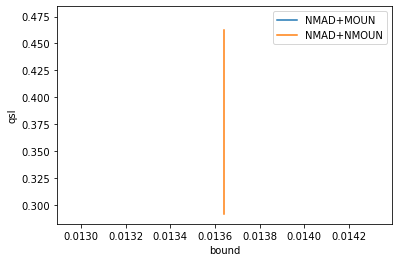

In [7]:
rhot=np.zeros((2,2))
rho=np.array([[0.5,0.5],[0.5,0.5]]) 
garb=np.zeros((2,2))
Cpar=np.zeros((cases,len(m)))
mix=np.zeros((cases,len(m)))
bound=np.zeros((cases,len(m)))
for j in range(cases):
    for i in range(len(m)):
        rhot=tevolve(l,k,m[i],c,time,rho,marker)
        bound[j,i]=4*rhot[0,0]*rhot[1,1]
        i=i+1
    i=0
plt.plot(bound[0,:],qsl[0,:],label='NMAD+MOUN')
plt.plot(bound[1,:],qsl[1,:],label='NMAD+NMOUN')
plt.xlabel('bound')
plt.ylabel('qsl')
plt.legend()
plt.show()

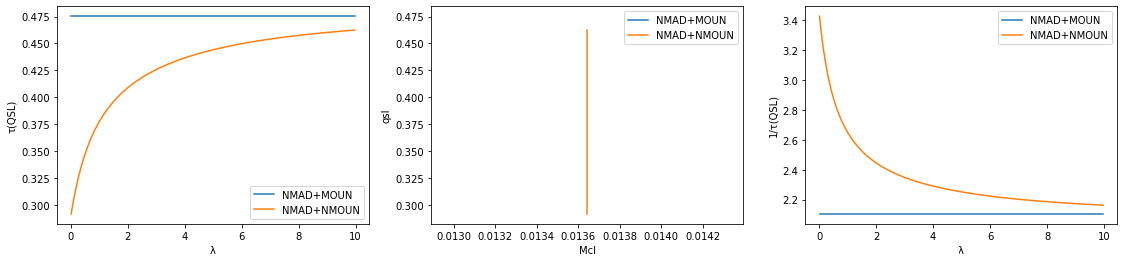

In [9]:
fig, axis = plt.subplots(1, 3, figsize=(19,4))
axis[0].plot(m,qsl[0,:], label='NMAD+MOUN')
axis[0].plot(m,qsl[1,:], label='NMAD+NMOUN')
axis[0].legend()
axis[0].set(xlabel='\u03BB', ylabel='\u03C4(QSL)')

axis[1].plot(bound[0,:],qsl[0,:],label='NMAD+MOUN')
axis[1].plot(bound[1,:],qsl[1,:],label='NMAD+NMOUN')
axis[1].set(xlabel='Mcl', ylabel='qsl')
axis[1].legend()

axis[2].plot(m,revqsl[0,:], label='NMAD+MOUN')
axis[2].plot(m,revqsl[1,:], label='NMAD+NMOUN')
axis[2].legend()
axis[2].set(xlabel='\u03BB', ylabel='1/\u03C4(QSL)')

fig.savefig('nmad_oun.png',dpi=120)

Text(0, 0.5, 'SSS measure')

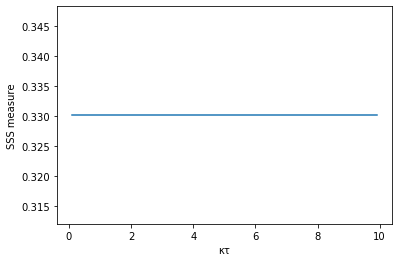

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath 

def xlind(l,k,m,c,t,rho):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xL2=np.kron(sm,I)@rho@np.kron(sp,I)-0.5*(np.kron(sp,I)@np.kron(sm,I)@rho+rho@np.kron(sp,I)@np.kron(sm,I))
    xL3=np.kron(sz,I)@rho@np.kron(sz,I)-rho
    ld=0.5*g2(l,k,t)*xL2+0.5*g3(m,c,t,marker)*xL3
    return ld

def gksl(r2,r3,rho):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xl2=np.kron(sm,I)@rho@np.kron(sp,I)-0.5*(np.kron(sp,I)@np.kron(sm,I)@rho+rho@np.kron(sp,I)@np.kron(sm,I))
    xl3=np.kron(sz,I)@rho@np.kron(sz,I)-rho
    ld=0.5*r2*xl2+0.5*r3*xl3
    return ld

def integrand(r2,r3,l,k,m,c,t,rho):
    garb=np.zeros((4,4))
    garb=xlind(l,k,m,c,t,rho)-gksl(r2,r3,rho) 
    norm=garb.T@garb
    eg=np.linalg.eig(norm)[0]
    val=abs(np.sqrt(eg[0]))+abs(np.sqrt(eg[1]))+abs(np.sqrt(eg[2]))+abs(np.sqrt(eg[3]))
    return val

def simpsons(r2,r3,l,k,m,c,rho,a,b,n):
    dtt=(b-a)/n
    s=0
    for j in range(n): 
        if j==0 or j==range(n):
            s=s+(dtt/3)*integrand(r2,r3,l,k,m,c,a+j*dtt,rho)
        if j%2==0:
            s=s+(2*dtt/3)*integrand(r2,r3,l,k,m,c,a+j*dtt,rho)
        if j%2!=0:
            s=s+(4*dtt/3)*integrand(r2,r3,l,k,m,c,a+j*dtt,rho)
    return s

rhox=np.array([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])
time=1 #actual driving time
k=np.arange(0.1,10,0.1)
marker=1
l=0.1*k
m,c=1,0.9
r2,r3=0,0
n=200
b=time #upper limit of integration
a=0 #lower limit of integration
dev=np.zeros(len(k))
for i in range(len(k)):
    dev[i]=simpsons(r2,r3,l[i],k[i],m,c,rhox,a,b,n)

plt.plot(k,dev)
plt.xlabel('\u03BA\u03C4')
plt.ylabel('SSS measure')


In [ ]:
#nmad+oun_alternate plot with the things for OUN varying instead of NMAD
#time is fixed at t=1, l,k and m are changing 
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as scint
import cmath
import math

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t,marker):
    if marker==1: #non markovian
        g3=0.5*c*(1-np.exp(-m*t))
    if marker==0:#Markovian
        g3=0.5*c
    return g3.real    

def tevolve(l,k,m,c,t,rho,marker): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    if marker==1: #non markovian
        oun=0.5*c*(t+(np.exp(-m*t)-1)/m)
    if marker==0:
        oun=0.5*c*t
    coh=rho[0,1]*cmath.sqrt(xt)*np.exp(-oun)
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+0.5*g3(m,c,t,marker)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho,marker): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho,marker)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max(abs(val))) #converts into float from complex
    return fx

def bures(l,k,m,c,time,rho,marker): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=tevolve(l,k,m,c,time,rho,marker)@rho
    z1=math.acos(abs(np.sqrt(garb.trace()))+2*np.sqrt(np.linalg.det(rho)*np.linalg.det(tevolve(l,k,m,c,time,rho,marker))))
    b=np.sin(z1)**2
    return b

k=np.arange(0.1,20,0.1)
l=0.1*k
#l=10*k
m=k
#m=0.1
c=10
cases=2 #values of c
#will have a marker to tell if its markovian or non markovian

rho=np.array([[0.5,0.5],[0.5,0.5]])  #time=np.arange(0,300,dt) 
time=1 #will give upper limits
n=200;#no. of points in the smaller integrations

a=0 #lower limit
b=time #upper limit
fint=np.zeros((cases,len(k)))
bur=np.zeros((cases,len(k)))
qsl=np.zeros((cases,len(k)))
revqsl=np.zeros((cases,len(k)))
for j in range(cases):
    for i in range(len(k)):
        if j==cases-1:
            marker=1
        else:
            marker=0
        f=lambda x:maxvalgen(l[i],k[i],m,c,x,rho,marker)
        fint[j,i]=scint.quad(f,a,b)[0]
        bur[j,i]=bures(l[i],k[i],m,c,time,rho,marker)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    revqsl[j,:]=np.divide(fint[j,:],bur[j,:])
    

plt.plot(k,qsl[0,:], label='NMAD+MROUN')
plt.plot(k,qsl[1,:], label='NMAD+NMOUN')
plt.xlabel('\u03BA\u03C4 \n actual driving time \u03C4=1')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()

plt.plot(k,revqsl[0,:], label='NMAD+MROUN')
plt.plot(k,revqsl[1,:], label='NMAD+NMOUN')
plt.xlabel('\u03BA\u03C4 \n actual driving time \u03C4=1')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()


ERROR! Session/line number was not unique in database. History logging moved to new session 321


In [ ]:
rho=np.array([[0.5,0.5],[0.5,0.5]]) 
rhot=np.zeros((2,2))
garb=np.zeros((2,2))
bound=np.zeros(len(k))
for i in range(len(k)):
    rhot=tevolve(l[i],k[i],m,c[i],time,rho)
    bound[i]=4*rhot[0,0]*rhot[1,1]
    i=i+1
    
plt.plot(bound,qsl)
plt.xlabel('Mcl',fontsize=16)
plt.ylabel('QSL',fontsize=16)
#plt.savefig('nmad_rtn_alt_trdoff.png',dpi=120,pad_inches = 0,bbox_inches='tight')
plt.show()

Text(0, 0.5, 'SSS measure')

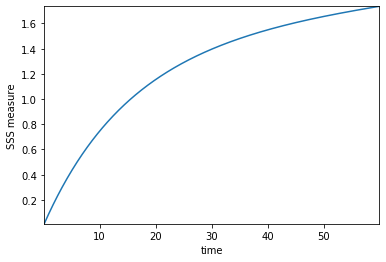

In [6]:
#deviation from semi group the nmad+rtn
#NMAD+RTN
#upper bound on the SSS
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import math
import cmath 

def g2(l,k,t):
  d=cmath.sqrt(l**2-2*k*l)
  g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
  return g2.real

def g3(m,c,t):
    g3=0.5*c*(1-np.exp(-m*t))
    return g3.real  

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xL2=np.kron(sm,I)@rhot@(np.kron(sp,I))-0.5*(np.kron(sp,I)@np.kron(sm,I)@rhot+rhot@(np.kron(sp,I))@np.kron(sm,I))
    xL3=np.kron(sz,I)@rhot@(np.kron(sz,I))-rhot
    ld=0.5*g2(l,k,t)*xL2+0.5*g3(m,c,t)*xL3
    return ld

def gksl(r2,r3,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xl2=np.kron(sm,I)@rhot@(np.kron(sp,I))-0.5*(np.kron(sp,I)@np.kron(sm,I)@rhot+rhot@(np.kron(sp,I))@np.kron(sm,I))
    xl3=np.kron(sz,I)@rhot@(np.kron(sz,I))-rhot
    ld=0.5*r2*xl2+0.5*r3*xl3
    return ld

def integrand(r2,r3,l,k,m,c,t,rhot):
    garb=np.zeros((4,4))
    garb=lind(l,k,m,c,t,rhot)-gksl(r2,r3,rhot)
    norm=garb.T@garb
    eg=np.linalg.eig(norm)[0]
    val=abs(np.sqrt(eg[0]))+abs(np.sqrt(eg[1]))+abs(np.sqrt(eg[2]))+abs(np.sqrt(eg[3]))
    return val

def integrator(r2,r3,l,k,m,c,time,rhot,dt,n):     
    fint=np.zeros(len(time)-1) #will hold the final integrated values
    summer=0
    j=0
    dtt=dt/n #smaller chunks
    while j<len(time)-1: 
        a=time[j] #lower limit
        """for z in range(n):
            b=a+dtt
            f=lambda x:integrand(r2,r3,l,k,m,c,x,rhot)
            summer=summer+quad(f,a,b)[0]
            a=b"""
        b=time[j+1]
        f=lambda x:integrand(r2,r3,l,k,m,c,x,rhot)
        summer=summer+quad(f,a,b)[0]
        fint[j]=summer
        #(fint[j])
        j=j+1
    return fint

rho=np.array([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])
dt=0.1
time=np.arange(0,60,dt)
#k=np.arange(0.1,7,0.1)
#l=0.1*k
k=0.1
n=10
l=0.1*k
c=2 #c=np.arange(0.1,2,0.1)
m=0.1
r2,r3=0,0 #upper bound, otherwise keeping it at 2,2 gives bout 200
b=time #upper limit of integration
a=0 #lower limit of integration
dev=np.zeros(len(time)-1)
dev=integrator(r2,r3,l,k,m,c,time,rho,dt,n)
dev=np.divide(dev,time[1:])

plt.plot(time[1:],dev)
plt.xlabel('time')
plt.margins(x=0,y=0)
plt.ylabel('SSS measure')


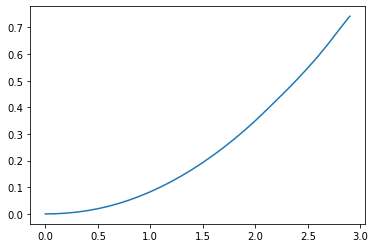

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import math
from scipy.optimize import minimize
import cmath 

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t):
    g3=0.5*c*(1-np.exp(-m*t))
    return g3.real  

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xL2=np.kron(sm,I)@rhot@(np.kron(sp,I))-0.5*(np.kron(sp,I)@np.kron(sm,I)@rhot+rhot@(np.kron(sp,I))@np.kron(sm,I))
    xL3=np.kron(sz,I)@rhot@(np.kron(sz,I))-rhot
    ld=0.5*g2(l,k,t)*xL2+0.5*g3(m,c,t)*xL3
    return ld

def gksl(r2,r3,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xl2=np.kron(sm,I)@rhot@(np.kron(sp,I))-0.5*(np.kron(sp,I)@np.kron(sm,I)@rhot+rhot@(np.kron(sp,I))@np.kron(sm,I))
    xl3=np.kron(sz,I)@rhot@(np.kron(sz,I))-rhot
    ld=0.5*r2*xl2+0.5*r3*xl3
    return ld

def integrand(r2,r3,l,k,m,c,t,rhot):
    garb=np.zeros((4,4))
    garb=lind(l,k,m,c,t,rhot)-gksl(r2,r3,rhot)
    norm=garb.T@garb
    eg=np.linalg.eig(norm)[0]
    val=abs(np.sqrt(eg[0]))+abs(np.sqrt(eg[1]))+abs(np.sqrt(eg[2]))+abs(np.sqrt(eg[3]))
    return val
def fun(r2,r3,l,k,m,c,t,rhot):
    f=lambda x:integrand(r2,r3,l,k,m,c,x,rhot)
    return quad(f,0,t)[0]

rho=np.array([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])
dt=1
time=np.arange(0,3,0.1) #time=np.arange(0,5,dt) #k=np.arange(0.1,7,0.1) #l=0.1*k
k=0.1
l=0.1*k
c=2 #c=np.arange(0.1,2,0.1)
m=0.1
points=10
garb=0
min=10000000
dev=np.zeros(len(time))
for i in range(len(time)):
    r2=np.linspace(g2(l,k,0),g2(l,k,time[i]),points)
    r3=np.linspace(g3(m,c,0),g3(m,c,time[i]),points)
    for j in range(len(r2)):
        for k in range(len(r3)):
            garb=fun(r2[j],r3[k],l,k,m,c,time[i],rho)
            if garb<min:
                min=garb
    dev[i]=min
    min=10000000
    points=points+1
plt.plot(time,dev)

In [2]:
print(r2)

[0.         0.13050345 0.2610069  0.39151035 0.52201379 0.65251724
 0.78302069 0.91352414 1.04402759 1.17453104 1.30503448 1.43553793
 1.56604138 1.69654483 1.82704828 1.95755173 2.08805518 2.21855862
 2.34906207 2.47956552 2.61006897 2.74057242 2.87107587 3.00157932
 3.13208276 3.26258621 3.39308966 3.52359311 3.65409656 3.78460001
 3.91510345 4.0456069  4.17611035 4.3066138  4.43711725 4.5676207
 4.69812415 4.82862759 4.95913104]


In [4]:
print(r3)

[0.         0.00662464 0.01324929 0.01987393 0.02649857 0.03312321
 0.03974786 0.0463725  0.05299714 0.05962179 0.06624643 0.07287107
 0.07949572 0.08612036 0.092745   0.09936964 0.10599429 0.11261893
 0.11924357 0.12586822 0.13249286 0.1391175  0.14574215 0.15236679
 0.15899143 0.16561607 0.17224072 0.17886536 0.18549    0.19211465
 0.19873929 0.20536393 0.21198857 0.21861322 0.22523786 0.2318625
 0.23848715 0.24511179 0.25173643]


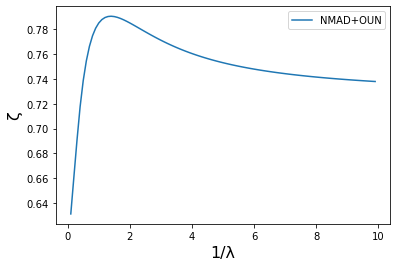

In [1]:
#trying to get the same things using the whole integration
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
import math
import cmath 

def g2(g,x,t): #1/g rates
    d=cmath.sqrt(1-2*g*x)
    intgnd=(2*g*cmath.sinh((0.5*d*t)/x))/(d*cmath.cosh((0.5*d*t)/x)+cmath.sinh((0.5*d*t)/x))
    return abs(intgnd.real)

"""def g2(g,x,t): #g rates for NMAD
    d=cmath.sqrt(1-(2*g)/x)
    intgnd=(2*g*cmath.sinh(x*0.5*d*t))/(d*cmath.cosh(x*0.5*d*t)+cmath.sinh(x*0.5*d*t))
    return intgnd.real"""

"""def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real"""

def g3(k,o,t):
    g=0.25*k*(1-np.exp(-t*o)) #rate for OUN, not inverse of o
    return g

def lind(g,k,o,x,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xL2=np.kron(sm,I)@rhot@(np.kron(sp,I))-0.5*(np.kron(sp,I)@np.kron(sm,I)@rhot+rhot@(np.kron(sp,I))@np.kron(sm,I))
    xL3=np.kron(sz,I)@rhot@(np.kron(sz,I))-rhot
    ld=g3(k,x,t)*xL3+g2(g,x,t)*xL2
    return ld

def gksl(r2,r3,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((4,4))
    I=np.identity(2)
    xl2=np.kron(sm,I)@rhot@(np.kron(sp,I))-0.5*(np.kron(sp,I)@np.kron(sm,I)@rhot+rhot@(np.kron(sp,I))@np.kron(sm,I))
    xL3=np.kron(sz,I)@rhot@(np.kron(sz,I))-rhot
    ld=r3*xL3+r2*xl2
    return ld

def integrand(r2,r3,g,k,o,x,t,rhot):
    garb=np.zeros((4,4))
    garb=lind(g,k,o,x,t,rhot)-gksl(r2,r3,rhot)
    norm=garb.T@garb
    eg=np.linalg.eig(norm)[0]
    val=abs(np.sqrt(eg[0]))+abs(np.sqrt(eg[1]))+abs(np.sqrt(eg[2]))+abs(np.sqrt(eg[3]))
    return val

rho=np.array([[1,0,0,1],[0,0,0,0],[0,0,0,0],[1,0,0,1]])
time=1
x=np.arange(0.1,10,0.1)
g=0.3
r2=g
k=0.6
o=1
r3=0.25*k
dev2=np.zeros(len(x))
for i in range(len(x)):
    f=lambda z:integrand(r2,r3,g,k,o,x[i],z,rho)
    dev2[i]=quad(f,0,time)[0]

plt.plot(x,dev2,label='NMAD+OUN')
plt.xlabel('1/\u03BB',fontsize=16)
plt.ylabel('\u03B6',fontsize=16)
plt.legend()
plt.savefig('SSS_nmad_oun.png',font

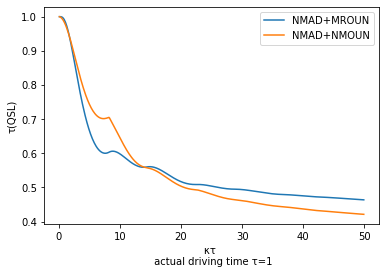

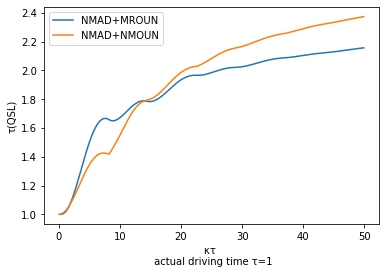

In [2]:
#combine both 
#nmad+oun
#time is fixed at t=1, l,k and m are changing 
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
import scipy.integrate as scint

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t,marker):
    if marker==1: #non markovian
        g3=0.5*c*(1-np.exp(-m*t))
    if marker==0:#Markovian
        g3=0.5*c
    return g3.real    

def tevolve(l,k,m,c,t,rho,marker): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    if marker==1: #non markovian
        oun=0.5*c*(t+(np.exp(-m*t)-1)/m)
    if marker==0:
        oun=0.5*c*t
    coh=rho[0,1]*cmath.sqrt(xt)*np.exp(-oun)
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+ 0.5*g3(m,c,t,marker)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho,marker): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho,marker)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max(abs(val))) #converts into float from complex
    return fx

def bures(l,k,m,c,time,rho,marker): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=tevolve(l,k,m,c,time,rho,marker)@rho
    z1=math.acos(abs(np.sqrt(garb.trace()))+2*np.sqrt(np.linalg.det(rho)*np.linalg.det(tevolve(l,k,m,c,time,rho,marker))))
    b=np.sin(z1)**2
    return b

k=np.arange(0.1,50,0.1)
l=0.1*k
#l=10*k
m=l
c=10
cases=2 #will have a marker to tell if its markovian or non markovian

rho=np.array([[0.5,0.5],[0.5,0.5]])  #time=np.arange(0,300,dt) 
time=1 #will give upper limits
n=200;#no. of points in the smaller integrations

a=0 #lower limit
b=time #upper limit
fint=np.zeros((cases,len(k)))
bur=np.zeros((cases,len(k)))
qsl=np.zeros((cases,len(k)))
revqsl=np.zeros((cases,len(k)))
for j in range(cases):
    for i in range(len(k)):
        if j==cases-1:
            marker=1
        else:
            marker=0
        f=lambda x:maxvalgen(l[i],k[i],m[i],c,x,rho,marker)
        fint[j,i]=scint.quad(f,a,b)[0]
        bur[j,i]=bures(l[i],k[i],m[i],c,time,rho,marker)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    revqsl[j,:]=np.divide(fint[j,:],bur[j,:])
    

plt.plot(k,qsl[0,:], label='NMAD+MROUN')
plt.plot(k,qsl[1,:], label='NMAD+NMOUN')
plt.xlabel('\u03BA\u03C4 \n actual driving time \u03C4=1')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()

plt.plot(k,revqsl[0,:], label='NMAD+MROUN')
plt.plot(k,revqsl[1,:], label='NMAD+NMOUN')
plt.xlabel('\u03BA\u03C4 \n actual driving time \u03C4=1')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()

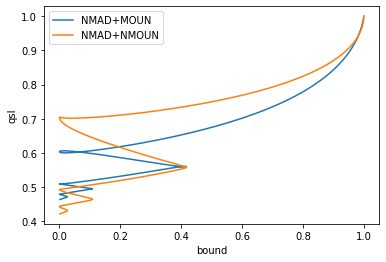

In [3]:
rhot=np.zeros((2,2))
rho=np.array([[0.5,0.5],[0.5,0.5]]) 
garb=np.zeros((2,2))
Cpar=np.zeros((cases,len(k)))
mix=np.zeros((cases,len(k)))
bound=np.zeros((cases,len(k)))
for j in range(cases):
    for i in range(len(k)):
        if j==cases-1:
            marker=1
        else:
            marker=0
        rhot=tevolve(l[i],k[i],m[i],c,time,rho,marker)
        Cpar[j,i]=abs(rhot[0,1])+abs(rhot[1,0])
        garb=rhot@rhot
        mix[j,i]=2*(1-garb.trace())
        bound[j,i]=Cpar[j,i]**2+mix[j,i]
        i=i+1
    i=0
plt.plot(bound[0,:],qsl[0,:],label='NMAD+MOUN')
plt.plot(bound[1,:],qsl[1,:],label='NMAD+NMOUN')
plt.xlabel('bound')
plt.ylabel('qsl')
plt.legend()
plt.show()

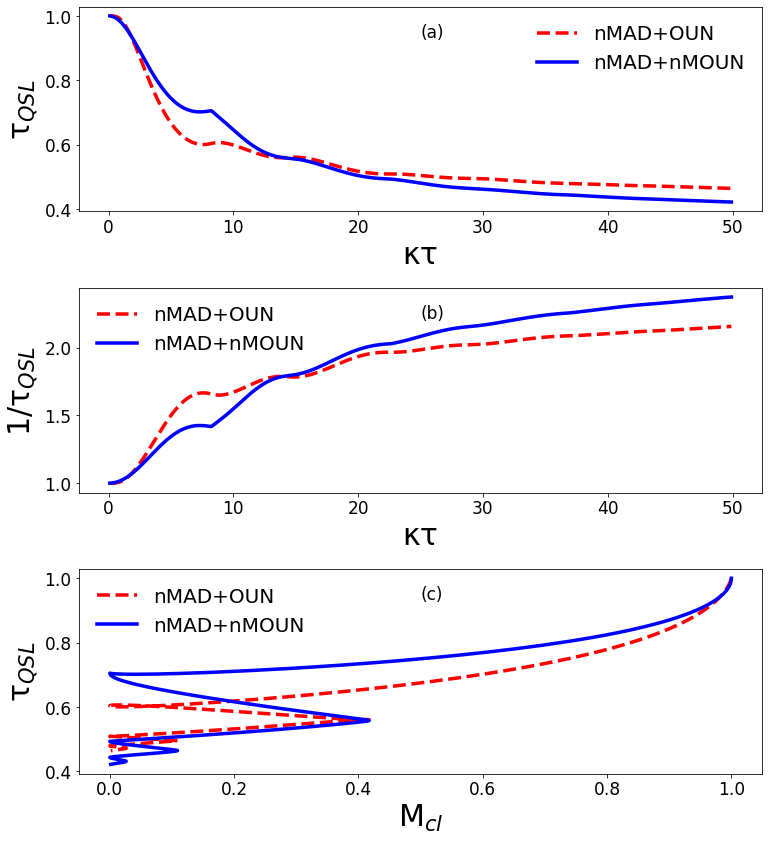

In [4]:
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True,figsize=(11,12))
plt.rcParams.update({'font.size': 17})
gs = gridspec.GridSpec(3, 3)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(k,qsl[0,:],'r--',linewidth=3.5, label='nMAD+OUN')
ax1.plot(k,qsl[1,:],'b', linewidth=3.5, label='nMAD+nMOUN')
ax1.set_xlabel('\u03BA\u03C4',fontsize=30)
ax1.set_ylabel('\u03C4$_{QSL}$',fontsize=30)
ax1.text(0.5, 0.85, '(a)',transform=ax1.transAxes)
ax1.legend(frameon=False, fontsize=20)

ax2 = fig.add_subplot(gs[1, :])
ax2.plot(k,revqsl[0,:],'r--',linewidth=3.5, label='nMAD+OUN')
ax2.plot(k,revqsl[1,:],'b',linewidth=3.5, label='nMAD+nMOUN')
ax2.legend(frameon=False, fontsize=20)
ax2.text(0.5, 0.85, '(b)',transform=ax2.transAxes)
ax2.set_xlabel('\u03BA\u03C4',fontsize=30)
ax2.set_ylabel('1/\u03C4$_{QSL}$',fontsize=30)

ax3 = fig.add_subplot(gs[2, :])
ax3.plot(bound[0,:],qsl[0,:],'r--',linewidth=3.5,label='nMAD+OUN')
ax3.plot(bound[1,:],qsl[1,:],'b',linewidth=3.5,label='nMAD+nMOUN')
ax3.text(0.5, 0.85, '(c)',transform=ax3.transAxes)
ax3.legend(frameon=False, fontsize=20)
ax3.set_xlabel('M$_{cl}$',fontsize=30)
ax3.set_ylabel('\u03C4$_{QSL}$',fontsize=30)

fig.savefig('cad_oun.png',dpi=120,bbox_inches='tight',pad_inches = 0.1)

/home/u136094/tmp/ipykernel_907277/1736333826.py:87: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  fint[j,i]=scint.quad(f,a,b)[0]/dlt
/home/u136094/tmp/ipykernel_907277/1736333826.py:52: RuntimeWarning: invalid value encountered in true_divide
  fx=np.sqrt(max(abs(val)))*(1+np.sqrt((1-n.trace())/(1-m.trace()))) #converts into float from complex
/home/u136094/tmp/ipykernel_907277/1736333826.py:87: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  fint[j,i]=scint.qua

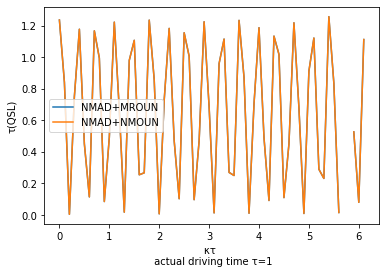

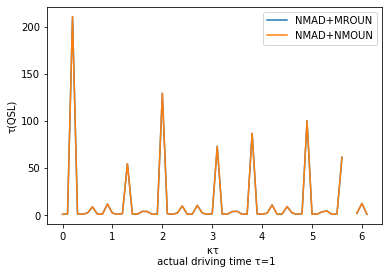

In [9]:
#t+dt
#combine both 
#nmad+oun
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
import scipy.integrate as scint

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t,marker):
    if marker==1: #non markovian
        g3=0.5*c*(1-np.exp(-m*t))
    if marker==0: #Markovian
        g3=0.5*c
    return g3.real    

def tevolve(l,k,m,c,t,rho,marker): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    if marker==1: #non markovian
        oun=0.5*c*(t+(np.exp(-m*t)-1)/m)
    if marker==0:
        oun=0.5*c*t
    coh=rho[0,1]*cmath.sqrt(xt)*np.exp(-oun)
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+0.5*g3(m,c,t,marker)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho,marker): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho,marker)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    n=rho@rho
    m=rhot@rhot
    fx=np.sqrt(max(abs(val)))*(1+np.sqrt((1-n.trace())/(1-m.trace()))) #the squares
    return fx

def bures(l,k,m,c,rhot,rhotd,marker): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=rhot@rhotd
    z1=math.acos(abs(np.sqrt(garb.trace())+2*np.sqrt(np.linalg.det(rho)*np.linalg.det(rhotd))))
    b=np.sin(z1)**2
    return b

#k=np.arange(0.1,50,0.1)
k=40
l=0.1*k
#l=10*k
t=np.arange(0,50,0.1)
m=l
c=10
cases=2 #will have a marker to tell if its markovian or non markovian

rho=np.array([[1,0],[0,0]])  #time=np.arange(0,300,dt) 
dlt=2
fint=np.zeros((cases,len(t)))
bur=np.zeros((cases,len(t)))
qsl=np.zeros((cases,len(t)))
revqsl=np.zeros((cases,len(t)))
for j in range(cases):
    for i in range(len(t)):
        if j==cases-1:
            marker=1
        else:
            marker=0
        a=t[i] #lower limit
        b=t[i]+dlt #upper limit
        f=lambda x:maxvalgen(l,k,m,c,x,rho,marker)
        fint[j,i]=scint.quad(f,a,b)[0]/dlt
        bur[j,i]=bures(l,k,m,c,tevolve(l,k,m,c,a,rho,marker),tevolve(l,k,m,c,b,rho,marker),marker)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    revqsl[j,:]=np.divide(fint[j,:],bur[j,:])
    

plt.plot(t,qsl[0,:], label='NMAD+MROUN')
plt.plot(t,qsl[1,:], label='NMAD+NMOUN')
plt.xlabel('\u03BA\u03C4 \n actual driving time \u03C4=1')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()

plt.plot(t,revqsl[0,:], label='NMAD+MROUN')
plt.plot(t,revqsl[1,:], label='NMAD+NMOUN')
plt.xlabel('\u03BA\u03C4 \n actual driving time \u03C4=1')
plt.ylabel('\u03C4(QSL)')
plt.legend()
plt.show()